# Introduction

**Intro** [Start](0.0_StartHere.ipynb) • <mark>[Intro](1.1_Introduction.ipynb)</mark>
<br> **pyrolite** [Geochem](2.1_pyroliteGeochem.ipynb) • [Visualisation](2.2_pyroliteVis.ipynb) • [alphaMELTS](2.3_pyroliteMELTS.ipynb) • [lambdas](2.4_lambdas.ipynb) <br> **Machine Learning** [Intro](4.0_MachineLearning.ipynb) • [Features](4.1_Features.ipynb)• [High-D Vis](4.3_HighDVis.ipynb) • [Classification](4.4_Classification.ipynb) <br>  **GitHub** [geochem4nickel](https://github.com/morganjwilliams/geochem4nickel) • [pyrolite](https://github.com/morganjwilliams/pyrolite)


#### <i class="fa fa-twitter" aria-hidden="true"><a href="https://twitter.com/metasomite" style="font-family:Courier New,Courier,Lucida Sans Typewriter,Lucida Typewriter,monospace;"> @metasomite</a></i>


# Lithogeochemical Data Analytics

<img src="https://pyrolite.readthedocs.io/en/develop/_static/icon.png" width="30%" style="display:inline;float: right; margin: 0px 15px 15px 0px;"/>

**Morgan Williams**

*Postdoc, CSIRO Mineral Resources*

#### <i class="fa fa-twitter" aria-hidden="true"><a href="https://twitter.com/metasomite" style="font-family:Courier New,Courier,Lucida Sans Typewriter,Lucida Typewriter,monospace;"> @metasomite</a></i>


This section of the workshop will focus on taking a data science approach to geochemical problems. The latter part of this section will cover some tools and include some examples of applying this in practice.

1. Data Driven Understanding
1. Adopting a Programmatic Approach
1. pyrolite
1. Data Sources and Data Mining
1. An Example: Machine Tectonic Discrimination


<div class="alert alert-warning">
  <b>Warning: You will see some code today</b>.<br> This notebook is set up so you can point and click through it, and break it as much as you wish.
</div>

https://tinyurl.com/geochem4nickellive

https://tinyurl.com/geochem4nickelGitHub

## Data Driven Understanding from Geochemistry

### Data driven?

> Understanding derived from the data itself, <br>rather than our idea of what the data represents.

Geochemists love classifying, binning and 'butterfly collecting', but how many of these divisions make sense in the natural world (e.g. consider the Total Alkali - Silica diagram)? 

In this case a data driven approach instead considers divisons according to the natural clustering of data, where they exist.

<img src="../img/TAS.png" width="45%" style="display:inline margin; 0px 15px 15px 0px;"/>

### Data Science in Exploration Lithogeochemistry

The best place to start is a good question.

Interpretation is required to understand the why and how, but there are many practical questions to ask of an exploration dataset:

* Is this more enriched/depleted in Y than expected?
* What rocks are most similar to X?
* Which chemical signatures are associated with mineralisation?
* Which features provide the most valuable information for prediction? At what scale?
* What setting did this form in?

We're follwing similar processes to what we've discussed this morning, just trying to get more out of the data and be a little less subjective.

Where it typically begins:

In [1]:
from pandas.plotting import scatter_matrix
from scripts.dataloader import load_belts, load_koms
import pyrolite.geochem

df = load_belts()

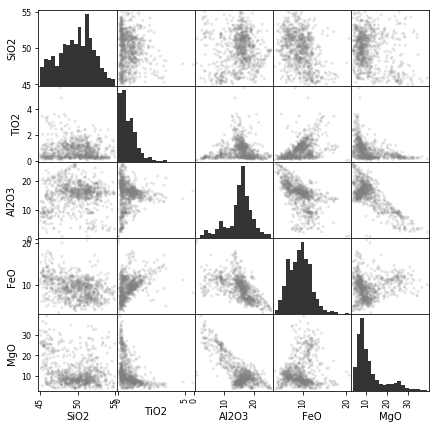

In [2]:
%matplotlib inline 
ax = scatter_matrix(
    df.pyrochem.oxides,
    alpha=0.2,
    c="0.5",
    figsize=(7, 7),
    hist_kwds={"bins": 20, "color": "0.2"},
)

### Quantifying Geochemical Context

Context is particularly important for geochemistry, as it's often expressed in relative terms. It's most useful when you have something else to compare it to.

* We discuss 'enrichement' and 'depletion', relative to some reference point.

* We normalise trace element chemistry to 'chondrite', 'primitive mantle' or 'MORB' to visualise the *relative* effects of geological processes
    * *'Let's ignore the effects of nucleosynthesis and planet formation for now..'*

* We use the term 'signature' to refer to the affinity or 'flavour' of geochemical compositions (e.g. MORB, E-MORB, N-MORB, 'Chondritic')

What we infer based on our geochemistry is commonly based on:
* local changes or gradients (e.g. alteration haloes, mineral zoning),  or
* similarity to some reference composition (e.g. basalts with 'ocean island basalt signatures'). 

In both of these instances, we express geochemistry relative to some reference point, but the relationship between our data and these reference compositions could often be better quantified. 

To highlight some of these issues, consider the second case, which is related to the problem of tectonic discrimination (which will come up a bit later):

* What is an 'ocean island basalt signature'?
    * *Ocean island basalts have a range of compositions, do you take the average? Median?*
    * *How close does it have to be to have an 'ocean island basalt signature'?*

* What if it also has an 'oceanic plateau' like signature?
    * *What's the probability that this is an ocean island basalt?*
    * *With what confidence can you say that this is an ocean island basalt, and not an oceanic plateau?*
    * *If you had analysed more elements, would you have the same confidence in the 'OIB signature'?*

### Beyond Three Dimensions: Multidimensional Analysis

One of the historical limitations for geochemistry has been the need to graphically represent data in 2D.
* This has limited how we approach solving geochemical problems.
* Multidimensional geochemical data analysis can overcome previous human-centric limitations and inaccuracies.

#### Trace Element Discrimination Diagrams



* Pearce's Th-Yb-Nb diagram offers some insight into the issues with using 2D classification schemes.

<div class="row">
<div class="column">
    <img src="../img/Smithies2018Fig1.png" width="35%" style="display:inline;float: right; margin: 0px 15px 15px 0px;"/>
    </div>
<div class="column">
    <img src="../img/Li2015Fig9.png" width="35%" style="display:inline;float: right; margin: 0px 15px 15px 0px;"/>
    </div>
</div> 


* The significant degree of overlap in these two dimensions between different tectonic settings renders this approach futile for generalised discrimination.

Figures from [Smithies (2018)] after [Pearce (2008)], and [Li et al. (2015)]).

[Li et al. (2015)]: https://doi.org/10.1016/j.lithos.2015.06.022 "Li, C., Arndt, N.T., Tang, Q., Ripley, E.M., 2015. Trace element indiscrimination diagrams. Lithos 232, 76–83. "

[Smithies (2018)]: https://doi.org/10.1016/j.epsl.2018.01.034 "Smithies, R.H., Ivanic, T.J., Lowrey, J.R., Morris, P.A., Barnes, S.J., Wyche, S., Lu, Y.-J., 2018. Two distinct origins for Archean greenstone belts. Earth and Planetary Science Letters 487, 106–116."

[Pearce (2008)]: https://doi.org/10.1016/j.lithos.2007.06.016 "Pearce, J.A., 2008. Geochemical fingerprinting of oceanic basalts with applications to ophiolite classification and the search for Archean oceanic crust. Lithos 100, 14–48."

#### A Quick Summary: Data Driven Understanding

* Our reference points are often distributions
* Classification is not often straightforward
* For statistics and machine learning, we can easily use more dimensions than what's easy to visualise

## Adopting a Programmatic Approach

Writing code to ask questions of our data.

### Is it worth the effort?

* We make less errors
> "One in five genetics papers contains errors thanks to Microsoft Excel" [DOI:10. 1186/s13059-016-1044-7](https://doi.org/10.1186/s13059-016-1044-7)

* Using a code-based approach to data analysis means that we can
    * effectively 'version' the process and 
    * identify errors after the fact
    
* Our analysis is reproducible

* Develop new tools, which you can integrate into your own workflows
* Automate the repetitive work, and use analysis for decision support
* We *can* become more productive

* We can better quantify uncertainty
* We can quantify how well our data support our models
* Iterative testing and model development
* Can change how we see the system as a whole
    * *e.g. beyond 2D and 3D diagrams to multidimensional analysis*

* **Changes the questions we ask**

Using open source software, and adopting open science practices:

* Can socialise data, ideas, methods, code and analyses
* The repeatable paper: share your data and analysis
* Build in interoperability and flexibility (open data formats, common standards)
* Build a community and develop consensus on **best practice** in a new era of geoscience

#### A Quick Summary: Adopting a Programmatic Approach

* Gaining a few new skills and writing a bit of code could help you get more value out of your data.
* It will take a bit of learning and won't happen overnight, but there's lots to gain.

## pyrolite

<img src="https://pyrolite.readthedocs.io/en/develop/_static/icon.png" width="25%" style="display:inline;float: right; margin: 0px 15px 15px 0px;"/>

> pyrolite is a set of tools for making the most of your geochemical data.

The python package includes functions for:
* working with compositional data
* transforming geochemical variables (e.g. elements to oxides)
* common plotting tasks
    e.g. spiderplots, ternary diagrams, bivariate and ternary density diagrams
* an interface for alphaMELTS
* numerous auxiliary utilities

In [26]:
from scripts.dataloader import load_belts

df = load_belts() # let's load the proterozoic belts dataset

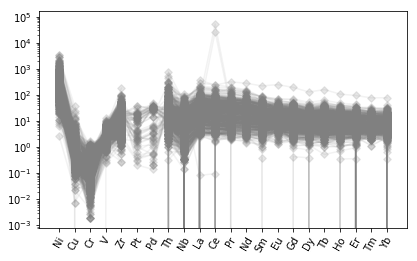

In [4]:
import pyrolite.plot
import pyrolite.geochem

df.pyrochem.elements \
    .pyrochem.normalize_to("Chondrite_PON") \
    .pyroplot.spider(color="0.5", alpha=0.1)

## Public Data Sources and Data Mining

* [EarthChem](http://www.earthchem.org/) provides a variety of geochemical data, dominated by whole-rock analyses
* [GEOROC](http://georoc.mpch-mainz.gwdg.de/georoc/) provides a large whole-rock, mineral and inclusion database
* [GSWA](http://geochem.dmp.wa.gov.au/geochem/)
* Many more!
* Together represent millions of analyses. 
    * Depending on your application, you could expect to work with between 100s and 100s of thousands of analyses.

#### Datasets: Biases and Structure

* What to target will depend on your objective
    * If you're working at a regional scale and want to understand regionally-specific processes, then target that
    * If you want to understand plate tectonics, get data from across the globe

* 'Variety is the spice of life'
    * Models will typically propagate or exaggerate biases in training data
    * When it comes to machine learning, if you wish to *generalise*, then a diverse dataset is valuable

* Class biases are common with geological datasets, especially for mineral exploration (targeting rarer rocks)

* Incorporate your own knowledge to extend datasets
    * Ratios
    * Proxies
    * Parameterisations
    * 'minimal-computation machine learning'

* Avoid including multiple highly correlated features for machine learning models - this is most obvious for the Rare Earth Elements (REE)
* Can either choose the more representative features, or employ dimensional reduction techniques to compress this information

#### 'pyogas templates'

* IoGas&trade; templates generated from data density of global compliations
* Currently used to generate kernel density contours from mafic rocks from different tectonic settings
* [github.com/morganjwilliams/gas-templates](https://github.com/morganjwilliams/gas-templates)


In [27]:
import pandas as pd
import pyrolite.geochem
import pyrolite.plot
import matplotlib.pyplot as plt

df = pd.read_csv("https://storage.googleapis.com/aegc2019/ueki2018.csv")
df.pyrochem.add_ratio("Th/Yb")
df.pyrochem.add_ratio("Nb/Yb");

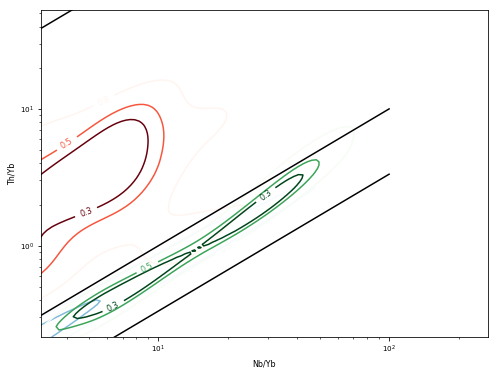

In [6]:
from pyrolite.plot.templates.pearce import pearceThNbYb

fig, ax = plt.subplots(1, figsize=(8, 6))
pearceThNbYb(ax)
lims = ax.axis()
ax = df.loc[(df.Class == "MOR"), ["Nb/Yb", "Th/Yb"]].pyroplot.density(
    ax=ax, logx=True, logy=True, bins=100, contours=[0.3, 0.5, 0.8], cmap="Blues"
)

df.loc[(df.Class == "CA"), ["Nb/Yb", "Th/Yb"]].pyroplot.density(
    ax=ax, logx=True, logy=True, bins=100, contours=[0.3, 0.5, 0.8], cmap="Reds"
)

df.loc[(df.Class == "OI"), ["Nb/Yb", "Th/Yb"]].pyroplot.density(
    ax=ax, logx=True, logy=True, bins=100, contours=[0.3, 0.5, 0.8], cmap="Greens"
)

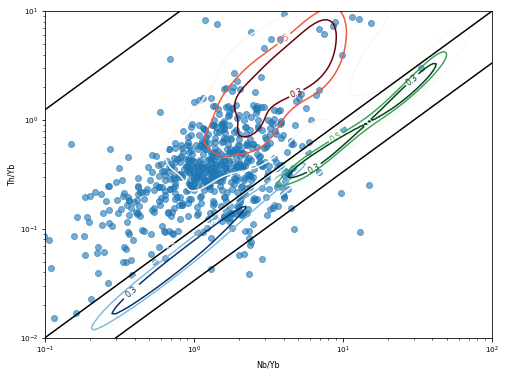

In [7]:
bdf = load_belts()
bdf.pyrochem.add_ratio("Th/Yb")
bdf.pyrochem.add_ratio("Nb/Yb")
bdf[["Nb/Yb", "Th/Yb"]].pyroplot.scatter(ax=ax, alpha=0.6)
ax.axis(lims)
ax.figure

<img src="../img/ClassifierComparison.png" width="50%" style="display:inline;float: right; margin: 0px 15px 15px 0px;"/>

## Example:<br>Machine Tectonic Discrimination

Machine clasification models used for tectonic discrimination using bulk-rock geochemical data include support vector classifiers, random forests and sparse multinomial regression ([Petrelli2016], [Ueki2018]). Here we'll rebuild one of the support vector classifiers.



[Petrelli2016]: https://doi.org/10.1007/s00410-016-1292-2 "Petrelli, M., Perugini, D., 2016. Solving petrological problems through machine learning: the study case of tectonic discrimination using geochemical and isotopic data. Contrib Mineral Petrol 171, 81."
[Ueki2018]: https://doi.org/10.1029/2017GC007401 "Ueki, K., Hino, H., Kuwatani, T., 2018. Geochemical Discrimination and Characteristics of Magmatic Tectonic Settings: A Machine-Learning-Based Approach. Geochemistry, Geophysics, Geosystems 19, 1327–1347."

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scripts.dataloader import load_belts

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [10]:
from pyrolite.geochem.ind import common_elements, common_oxides

from pyrolite.util.skl.vis import plot_confusion_matrix
from pyrolite.util.skl.pipeline import SVC_pipeline
from pyrolite.util.skl.transform import CLRTransform

Using TensorFlow backend.


Here we'll use the 29-dimension tectonic discrimination dataset (majors, minors, traces and isotopes) from Ueki et al. (2018), modified to list the specific tectonic setting in a 'Class' column. 

Tectonic setting classes are as follows:  BAB: Back Arc Basin, CA: Continental Arc, CFB: Continental Flood Basalt, IA: Island Arc, IOA: Intra-oceanic Arc, MOR: Mid-Ocean Ridge, OI: Ocean Island, OP: Oceanic Plateau.

In [11]:
belts = load_belts()
df = pd.read_csv("https://storage.googleapis.com/aegc2019/ueki2018.csv")
df = df.pyrochem.convert_chemistry(to=[i for i in belts.columns if i in df.columns])

abundances = df.pyrochem.list_compositional

classes = list(df.Class.unique())
classes

['CA', 'IA', 'IOA', 'BAB', 'CFB', 'MOR', 'OP', 'OI']

To make this dataset suitable for use to train a classifier, let's first split the features from the true classes and then scale the training data such that each column falls in the range \\([-1, 1]\\). 

In [12]:
X, y = df.loc[:, abundances], df["Class"]

In [13]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)  

To assess the performance of our classifier, we'll need to hold back an independent subset of the data for testing purposes. Here we reserve 30% of the data for testing, and ensure that it will proportionately contain data for each of our classes.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, test_size=0.3)

Now we can train a simple classifier:

In [15]:
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
svcscore = clf.score(X_test, y_test)
"Overall Accuracy: {:.1f}%".format(svcscore * 100)

'Overall Accuracy: 76.6%'

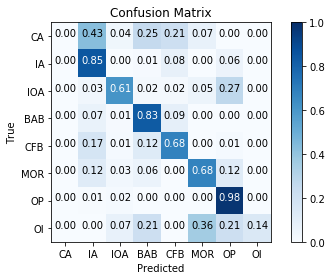

In [17]:
plot_confusion_matrix(clf, X_test, y_test, normalize=True, classes=classes)

In [18]:
scaler = StandardScaler()
XX_ = scaler.fit_transform(CLRTransform().fit_transform(X))

In [19]:
XX_train, XX_test, yy_train, yy_test = train_test_split(
    XX_, y, stratify=y, test_size=0.3
)

Now we can build an optimised classifier, in this case using a pipeline constructor from pyrolite:

In [20]:
gs = SVC_pipeline(
    verbose=1,
    probability=True,
    param_grid=dict(
        svc__gamma=np.logspace(-2.3, -0.85, 5),
        svc__C=np.logspace(-0.5, 2, 5),  # limit C parameter to avoid overfitting
    ),
)
gs.fit(XX_train, yy_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   38.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('svc', SVC(C=1.0, cache_size=500, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'svc__gamma': array([0.00501, 0.01155, 0.02661, 0.06131, 0.14125]), 'svc__C': array([  0.31623,   1.33352,   5.62341,  23.71374, 100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [21]:
svcgsscore = gs.best_estimator_.score(XX_test, yy_test)
"Overall Accuracy: {:.1f}%".format(svcgsscore * 100)

'Overall Accuracy: 85.1%'

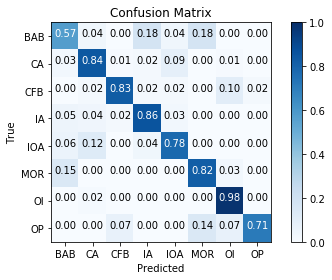

In [22]:
plot_confusion_matrix(gs.best_estimator_, XX_test, yy_test, normalize=True)

In [23]:
probs = (
    pd.DataFrame(
        data=gs.best_estimator_.predict_proba(XX_test[:8]),
        columns=gs.best_estimator_.classes_,
    )
    * 100
)
probs["Expect"] = yy_test[:8].tolist()
table = probs[probs.columns[::-1]].round(2)
table.style.background_gradient(cmap="Blues", axis=1)

,Expect,OP,OI,MOR,IOA,IA,CFB,CA,BAB
0,OI,0.21,98.6,0.12,0.03,0.05,0.44,0.47,0.07
1,IA,0.65,0.03,0.06,0.37,92.86,0.09,0.46,5.48
2,CA,1.12,3.01,0.94,2.84,1.6,0.74,88.96,0.79
3,OI,0.04,99.69,0.14,0.02,0.01,0.01,0.09,0.01
4,CA,0.02,0.01,0.16,0.22,0.06,0.94,97.79,0.79
5,CA,0.01,0.01,0.01,79.25,0.39,0.09,19.31,0.95
6,MOR,1.63,1.66,65.66,1.29,0.76,9.53,2.83,16.64
7,IA,0.11,0.08,0.05,1.9,86.87,0.07,9.27,1.65


We can now use this classifier to predict what the tectonic setting of our mafic rocks may have been:

In [24]:
data = belts[df.pyrochem.list_compositional]
data[data <= 0] = np.nan
data = pd.DataFrame(data.dropna(axis=0, how="any"))
data.loc[:, :] = scaler.transform(CLRTransform().fit_transform(data))

In [25]:
probs = (
    pd.DataFrame(
        data=gs.best_estimator_.predict_proba(pd.DataFrame(data)),
        columns=gs.best_estimator_.classes_,
    )
    * 100
)
probs["expect"] = gs.best_estimator_.predict(pd.DataFrame(data))
table = probs[probs.columns[::-1]].round(2)
table.head(5).style.background_gradient(cmap="Blues", axis=1)

,expect,OP,OI,MOR,IOA,IA,CFB,CA,BAB
0,IOA,2.19,1.39,1.1,43.69,1.51,28.58,11.57,9.97
1,CA,1.84,0.96,0.86,5.82,16.23,10.51,56.86,6.93
2,IA,0.58,0.41,0.3,3.63,72.73,1.63,9.16,11.55
3,IOA,0.11,0.08,0.1,82.89,0.22,4.96,11.4,0.23
4,CA,3.05,3.66,1.6,1.85,21.02,9,54.79,5.04


## Some Final Comments

* These tools are useful as part of a workflow, use them where you see practical advantages

* Know your data, and get it in shape!

* External public data with broad scope can be useful to avoid biases and reduce sensitivities to outliers/novel data


* Start with simple models, and build multiple

* Understanding the relative certainty of your predictions is useful

* Know what question you trying to answer, and adapt to your application
    * Targeted selection of features can increase the relevance and accuracy of predictions!

## Fin.

Next: [pyrolite: Python for Geochemistry](2.1_pyroliteGeochem.ipynb)

Specificity - Also - could you be sure someone else means the same thing?

Repeatability - Would someone else come to the same conclusion?

### How do you like your geochemical data distributed..?

Acknowledging and accouting for the log-normally distributed nature of geochemical data can help deal with some spurious correlation, and allow for more robust geochemical statistics.

<img src="https://pyrolite.readthedocs.io/en/develop/_images/CompositionalDistributions.png" width="45%" style="float: left; margin: 0px 15px 15px 0px;"/>